In [1]:
# Importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Reading the data 

data = pd.read_csv('temperature.csv')

In [3]:
# data check 

data.head()

,Unnamed: 0,longitude,latitude,1,2,3,4,5,6,7,8,9,10,11,12
0,79669,138.75,-4.75,28.5,28.7,28.5,30.2,29.9,28.8,27.3,28.5,28.4,28.4,29.2,29.0
1,79091,136.75,-14.25,29.4,29.8,29.0,29.7,28.2,26.0,23.9,26.0,26.4,28.3,29.8,30.2
2,22723,-57.75,-19.75,28.8,29.0,28.2,25.5,23.6,22.6,24.7,25.4,26.6,27.7,28.1,28.1
3,40355,22.75,-18.25,25.7,25.6,25.6,24.9,21.3,18.0,17.7,21.0,25.1,28.7,27.7,26.1
4,17837,-71.75,-40.25,10.9,10.0,7.9,5.3,2.8,1.9,-0.2,-0.2,1.4,3.6,6.5,8.1


 Question - 5 - a 
 
 Create a scatterplot of latitude and longitude of the 2000 locations (using a natural choice of which variable to assign to the x-axis.)

 Calculate the minimum and  maximum latitudes in the dataset and make a plot of the marginal distribution of latitude.
 
 
 Does the distribution of locations appear to be a random sample of earth’s spherical surface?

<Axes: xlabel='longitude', ylabel='latitude'>

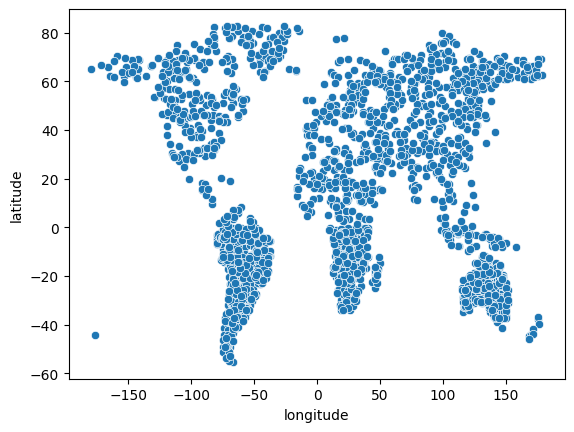

In [4]:
# creating a scatter plot of latitude vs longitude

sns.scatterplot(x = 'longitude', y = 'latitude', data = data)

The minimum latitude is: -55.25
The maximum longitude is: 82.75


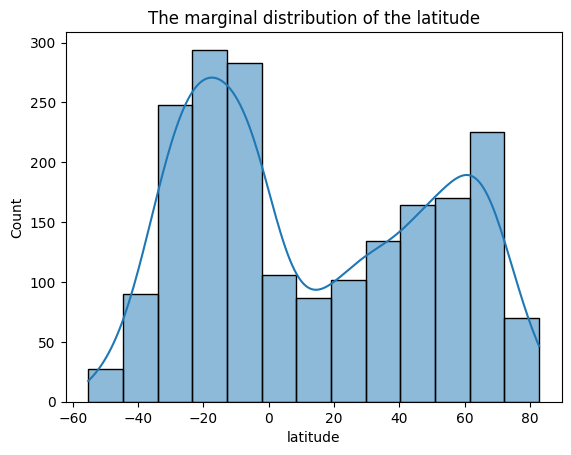

In [5]:
# Finding the maximum and minimum latitude and longitude

min_latitude = data['latitude'].min()
max_latitude = data['latitude'].max()

print('The minimum latitude is:', min_latitude)
print('The maximum longitude is:', max_latitude)

# The marginal distribution of the latitude

sns.histplot(data['latitude'], kde = True)
plt.title('The marginal distribution of the latitude')
plt.show()

Does the distribution of locations appear to be a random sample of earth’s spherical surface?

No , the distributions of locations do not appear random sample primarily because - 

-> Lesser points (less dense) towards equator , since earth is sphere a random sample should be max dense towards equator  

Question : 5 - b 

Make scatterplots of the latitude and temperature data and compute the correlation  separately for January and July. 

Is there a natural justification to choose one variable for the x-axis and the other for the y-axis? Why?

The correlation between latitude and temperature in 1 is: -0.8808243838931636
The correlation between latitude and temperature in 7 is: -0.09081110315246942


np.float64(-0.09081110315246942)

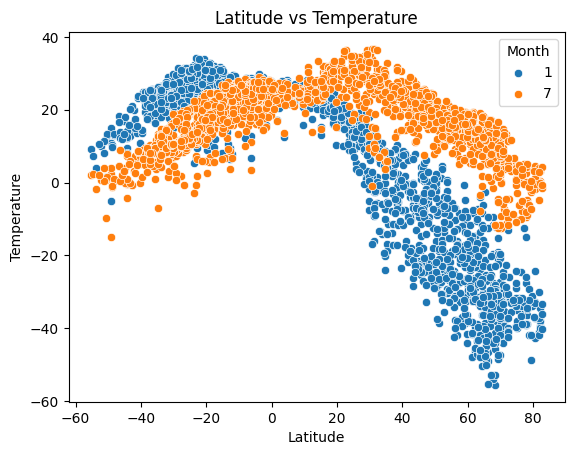

In [8]:
columns_list = ['latitude' , '1']


def latitude_vs_temp(df , month):
    columns_list = ['latitude' , month]
    df_month = df[columns_list]
    sns.scatterplot(x='latitude', y=month, data=df_month, label=month)
    plt.legend(title = 'Month')
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.title('Latitude vs Temperature')
    correlation = np.corrcoef(df_month['latitude'], df_month[month])[0, 1]
    print('The correlation between latitude and temperature in', month, 'is:', correlation)
    return correlation

latitude_vs_temp(data, '1')
latitude_vs_temp(data, '7')

Is there a natural justification to choose one variable for the x-axis and the other for the y-axis? Why?

Yes , while writing a equation value of X gives value of Y so , intutively latitude points towards expected temperature (in particular month of year) hence the choice of latitude being X and Temperature being Y

Question 5 - c : Describe what you find both within and between each scatterplot and compare the two correlations. Hypothesize on what could explain any noteworthy differences found.



Answer 5 - c : In month of January - there is greater difference between temperatures of equator (points close to zero) and poles.While in July the difference is not wide between equator and poles. This is possibly due to winter in northern hemisphere in Jan hence extrem temperature towards poles whereas in Jul it is summer in northern hemisphere and winter in southern hemisphere which has lesser landmass towards poles hence higher temperatures observed compared to winter in northern hemisphere 


Question 5 -d 

Compute the correlation between latitude and temperature in July for the locations in the southern hemisphere (latitude < 0). 

Plot 
    
    scatterplots 
    
    and the linear MMSE  estimator 
    
    and corresponding residuals.

The correlation between latitude and temperature in 7 and Southern Hemisphere is 0.853957309343342


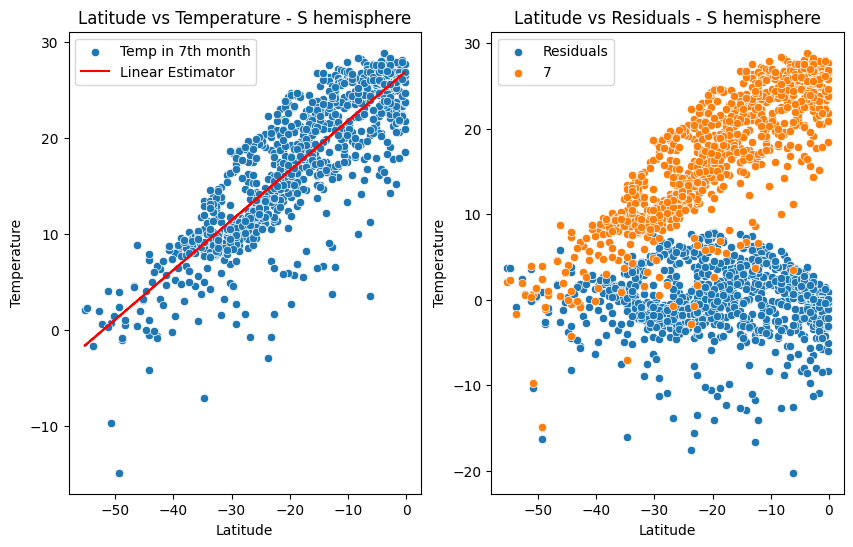

In [12]:
# adding northern and southern hemisphere rules 

conditions = [data['latitude'] < 0, data['latitude'] > 0]
choices = ['Southern Hemisphere', 'Northern Hemisphere']
data['Hemisphere'] = np.select(conditions, choices,'NA')

# compute correlation for a hemisphere 

def latitude_vs_temp_hemisphere(df , month, hemisphere):
    df_month = df[df['Hemisphere'] == hemisphere]
    columns_list = ['latitude' , month]
    df_month = df_month[columns_list]
    
    # scatter plot of latitude vs temperature
    sns.scatterplot(x='latitude', y=month, data=df_month, label=month)
    plt.legend()
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    correlation = np.corrcoef(df_month['latitude'], df_month[month])[0, 1]
    print(f'The correlation between latitude and temperature in {month} and {hemisphere} is {correlation}')
    #return correlation

# compute the linear estimator for latitude vs temperature in the northern hemisphere

chosen_hemisphere = 'Southern Hemisphere'
chosen_month = '7'

model = LinearRegression()
model.fit(data[data['Hemisphere'] == chosen_hemisphere][['latitude']], data[data['Hemisphere'] == chosen_hemisphere][chosen_month])
slope = model.coef_[0]
intercept = model.intercept_
y_hat = slope * data[data['Hemisphere'] == chosen_hemisphere]['latitude'] + intercept
residuals = data[data['Hemisphere'] == chosen_hemisphere][chosen_month] - y_hat

# scatter plot of latitude vs temperature + linear estimator

fig , ax = plt.subplots(1,2,figsize=(10, 6))


sns.scatterplot(x='latitude', y=chosen_month, data=data[data['Hemisphere'] == chosen_hemisphere], label=f'Temp in {chosen_month}th month', ax=ax[0])
ax[0].title.set_text('Latitude vs Temperature - S hemisphere')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Temperature')
ax[0].plot(data[data['Hemisphere'] == chosen_hemisphere]['latitude'], y_hat, color='red', label='Linear Estimator')
ax[0].legend()

sns.scatterplot(x='latitude', y=residuals, data=data[data['Hemisphere'] == chosen_hemisphere], label='Residuals', ax=ax[1])
ax[1].title.set_text('Latitude vs Residuals - S hemisphere')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Residuals')
ax[1].legend()

latitude_vs_temp_hemisphere(data,'7','Southern Hemisphere')

Question 5 - d : 

 Repeat the experiment for locations in the northern hemisphere (latitude > 0) in  January

The correlation between latitude and temperature in 1 and Northern Hemisphere is -0.9044282825621139


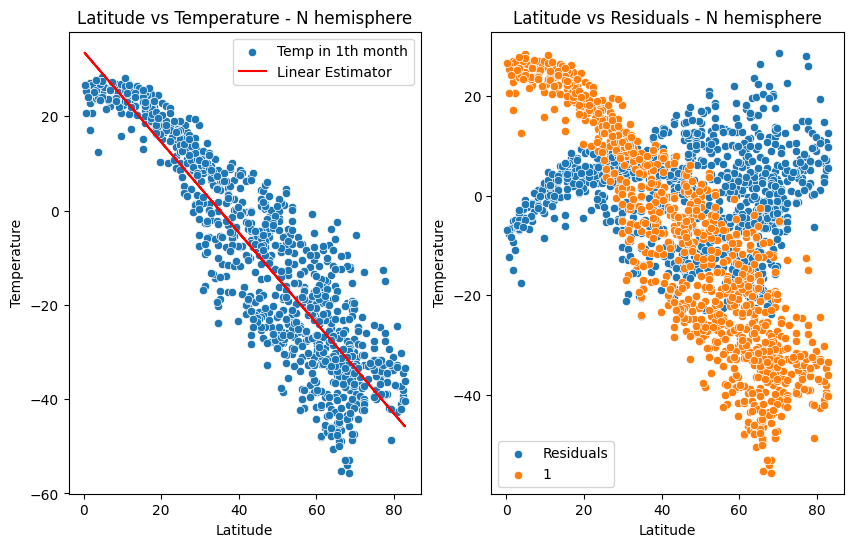

In [14]:
chosen_hemisphere = 'Northern Hemisphere'
chosen_month = '1'

model = LinearRegression()
model.fit(data[data['Hemisphere'] == chosen_hemisphere][['latitude']], data[data['Hemisphere'] == chosen_hemisphere][chosen_month])
slope = model.coef_[0]
intercept = model.intercept_
y_hat = slope * data[data['Hemisphere'] == chosen_hemisphere]['latitude'] + intercept
residuals = data[data['Hemisphere'] == chosen_hemisphere][chosen_month] - y_hat


# scatter plot of latitude vs temperature + linear estimator

fig , ax = plt.subplots(1,2,figsize=(10, 6))


sns.scatterplot(x='latitude', y=chosen_month, data=data[data['Hemisphere'] == chosen_hemisphere], label=f'Temp in {chosen_month}th month', ax=ax[0])
ax[0].title.set_text('Latitude vs Temperature - N hemisphere')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Temperature')
ax[0].plot(data[data['Hemisphere'] == chosen_hemisphere]['latitude'], y_hat, color='red', label='Linear Estimator')
ax[0].legend()

sns.scatterplot(x='latitude', y=residuals, data=data[data['Hemisphere'] == chosen_hemisphere], label='Residuals', ax=ax[1])
ax[1].title.set_text('Latitude vs Residuals - N hemisphere')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Residuals')
ax[1].legend()


latitude_vs_temp_hemisphere(data,'1','Northern Hemisphere')

 (f) Explain your findings in the previous part. What do you notice? Hypothesize some explanations.

In July, as we move from the South Pole to the Equator (negative to zero latitude), the temperature increases, resulting in a positive correlation. In January, as we move from the Equator to the North Pole (zero to positive latitude), the temperature decreases, resulting in a negative correlation.

Essentially, the temperature decreases in both cases (January and July) as we move from the Equator to the poles. However, mathematically, since northern hemisphere latitudes are represented as positive and lower temperatures are represented as negative, we observe an inverse relationship.